In [256]:
from sklearn import cluster
import pandas as pd
import numpy as np

In [257]:
ottWeather = pd.read_csv('ottawa_weather_2018.csv')

In [258]:
ottWeather


,DateTime,Year,Month,Day,Max Temp,Min Temp,Mean Temp,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h)
0,2018-01-01,2018,1,1,-18.9,-30.2,-24.6,0.0,0.0,0.0,33,31
1,2018-01-02,2018,1,2,-7.1,-27.2,-17.2,0.0,2.6,1.6,33,50
2,2018-01-03,2018,1,3,-6.9,-10.0,-8.5,0.0,0.0,0.0,35,46
3,2018-01-04,2018,1,4,-7.8,-20.2,-14.0,0.0,5.0,1.0,35,57
4,2018-01-05,2018,1,5,-20.2,-25.2,-22.7,0.0,0.0,0.0,35,63
5,2018-01-06,2018,1,6,-21.2,-25.6,-23.4,0.0,0.0,0.0,35,56
6,2018-01-07,2018,1,7,-9.3,-27.9,-18.6,0.0,9.0,5.0,35,32
7,2018-01-08,2018,1,8,1.1,-9.3,-4.1,0.0,10.2,8.0,50,43
8,2018-01-09,2018,1,9,0.0,-14.0,-7.0,0.0,0.0,0.0,48,54
9,2018-01-10,2018,1,10,-0.8,-18.2,-9.5,0.6,0.0,0.6,47,32


In [259]:
ottWeather=ottWeather.iloc[:,4:12]

In [260]:
ottWeather

,Max Temp,Min Temp,Mean Temp,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Spd of Max Gust (km/h)
0,-18.9,-30.2,-24.6,0.0,0.0,0.0,33,31
1,-7.1,-27.2,-17.2,0.0,2.6,1.6,33,50
2,-6.9,-10.0,-8.5,0.0,0.0,0.0,35,46
3,-7.8,-20.2,-14.0,0.0,5.0,1.0,35,57
4,-20.2,-25.2,-22.7,0.0,0.0,0.0,35,63
5,-21.2,-25.6,-23.4,0.0,0.0,0.0,35,56
6,-9.3,-27.9,-18.6,0.0,9.0,5.0,35,32
7,1.1,-9.3,-4.1,0.0,10.2,8.0,50,43
8,0.0,-14.0,-7.0,0.0,0.0,0.0,48,54
9,-0.8,-18.2,-9.5,0.6,0.0,0.6,47,32


In [261]:
ottWeather = np.array(ottWeather)

In [262]:
k_means = cluster.KMeans(n_clusters=4)

In [263]:
k_means.fit(ottWeather)
k_means


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [264]:
labels = k_means.labels_

In [282]:
centroids = k_means.cluster_centers_
centroids

array([[  5.00571429e+00,  -2.96000000e+00,   1.02285714e+00,
          2.11428571e+00,   1.06142857e+00,   3.02500000e+00,
          3.21428571e+00,   4.54714286e+01],
       [  2.49246667e+01,   1.19793333e+01,   1.84793333e+01,
          1.37866667e+00,   2.44249065e-15,   1.37866667e+00,
          8.88178420e-15,   3.75200000e+01],
       [ -5.91515152e+00,  -1.59242424e+01,  -1.09378788e+01,
          2.37878788e-01,   1.49696970e+00,   1.12575758e+00,
          1.91666667e+01,   4.14242424e+01],
       [  2.69111111e+01,   1.57333333e+01,   2.13444444e+01,
          3.11111111e+01,  -1.11022302e-16,   3.11111111e+01,
         -8.88178420e-16,   5.02222222e+01]])

In [280]:
from matplotlib import pyplot
for i in range(4):
   ds = ottWeather[np.where(labels==i)]
    # plot the data observations
   pyplot.plot(ds[:,0],ds[:,1],'.')
   pyplot.xlabel("Max Temp")
   pyplot.ylabel("Min Temp") 
   pyplot.title("Ottawa Weather Dataset with 4 clusters")
   # plot the centroids
   lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')

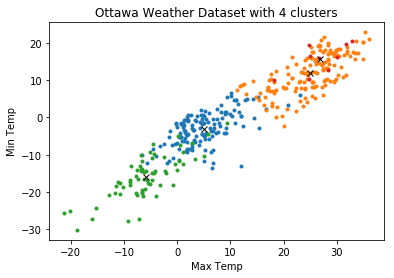

In [281]:
pyplot.show()